In [1]:
#Importing the necessary libraries
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D,Input

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Preparing my layers
input=keras.layers.Input(shape=2)
layer1=Dense(units=10,activation='relu',use_bias=True)
layer2=Dense(units=12,activation='relu',use_bias=True)
layer3=Dense(units=12,activation='relu',use_bias=True)
layer4=Dense(units=1,activation='relu',use_bias=True)

In [4]:
# Let us check the weights in the layers
print(layer1.weights)
print(layer2.weights)
print(layer3.weights)

[]
[]
[]


In [5]:
# Let us build the model
model=Sequential()
model.add(input)
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 12)                132       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [6]:
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

In [7]:
model._name

'sequential'

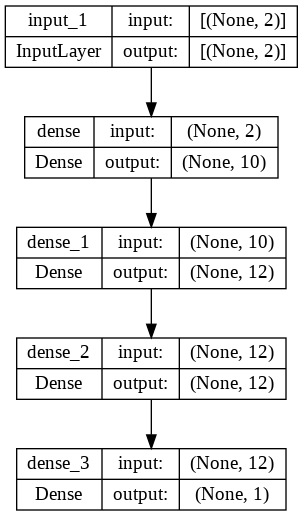

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
# Let us check the weights again
print(layer1.weights)
print(layer2.weights)
print(layer3.weights)

[<tf.Variable 'dense/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.552978  ,  0.37169224, -0.1266349 ,  0.38233513,  0.31708056,
        -0.08231282, -0.3659879 , -0.13847417, -0.28236365,  0.6608358 ],
       [ 0.22443855, -0.1426583 , -0.46101755, -0.00290495, -0.06753254,
         0.14159   ,  0.47891027, -0.5771158 ,  0.12686723,  0.21735823]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
[<tf.Variable 'dense_1/kernel:0' shape=(10, 12) dtype=float32, numpy=
array([[ 0.04119003, -0.26933426, -0.28301167, -0.25418526,  0.29793632,
        -0.10116765,  0.39367348,  0.4943052 ,  0.33912885,  0.3356182 ,
         0.4542439 ,  0.3132878 ],
       [-0.23015568,  0.5141391 ,  0.29174024,  0.05169058,  0.04175931,
        -0.4937677 ,  0.13675201, -0.5181625 , -0.10732055,  0.2743916 ,
         0.2773323 ,  0.26076812],
       [-0.47346362,  0.04625374,  0.09397143,  0.0651531

In [10]:
import pandas
inputDataFrame=pandas.read_csv('/content/drive/MyDrive/CSE 4-2/CSE-442/Codes/DataDeepLearning.csv')
print(inputDataFrame)

     x1  x2  y1=4*x1+5*x2+5  y2=10*x1+10*x2  y3=3*x1+10*x2
0    80  58             615            1380            820
1    19  87             516            1060            927
2    81   4             349             850            283
3    25  34             275             590            415
4     8  63             352             710            654
..   ..  ..             ...             ...            ...
994  49   8             241             570            227
995  23  90             547            1130            969
996  85  23             460            1080            485
997  42  18             263             600            306
998  94  52             641            1460            802

[999 rows x 5 columns]


In [11]:
x1s=inputDataFrame['x1'].to_numpy()
x2s=inputDataFrame['x2'].to_numpy()
y1s=inputDataFrame['y1=4*x1+5*x2+5'].to_numpy()
y2s=inputDataFrame['y2=10*x1+10*x2'].to_numpy()
y3s=inputDataFrame['y3=3*x1+10*x2'].to_numpy()

In [12]:
x1s.shape

(999,)

In [13]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)

In [14]:
x1s.shape

(999, 1)

In [15]:
x=np.concatenate((x1s,x2s),axis=1)

In [16]:
print(x)

[[80 58]
 [19 87]
 [81  4]
 ...
 [85 23]
 [42 18]
 [94 52]]


In [17]:
x.shape

(999, 2)

In [18]:
print(x1s)
print(x2s)
print(y1s)
print(y2s)
print(y3s)

[[ 80]
 [ 19]
 [ 81]
 [ 25]
 [  8]
 [ 87]
 [ 42]
 [ 41]
 [ 65]
 [ 74]
 [ 98]
 [ 12]
 [ 86]
 [ 48]
 [ 54]
 [ 51]
 [ 96]
 [ 86]
 [ 82]
 [100]
 [ 24]
 [ 78]
 [ 69]
 [ 38]
 [ 35]
 [ 66]
 [ 98]
 [ 87]
 [  2]
 [ 40]
 [ 17]
 [ 73]
 [  3]
 [ 58]
 [ 51]
 [ 63]
 [ 13]
 [ 72]
 [ 72]
 [ 70]
 [ 15]
 [ 56]
 [ 47]
 [  7]
 [ 15]
 [ 54]
 [  5]
 [ 46]
 [ 80]
 [ 20]
 [ 51]
 [  2]
 [ 70]
 [ 73]
 [ 68]
 [ 20]
 [ 37]
 [ 73]
 [ 18]
 [ 79]
 [  7]
 [ 15]
 [ 23]
 [  1]
 [ 41]
 [ 43]
 [ 88]
 [  1]
 [ 93]
 [ 17]
 [ 73]
 [ 59]
 [ 45]
 [ 85]
 [ 57]
 [ 38]
 [ 11]
 [ 92]
 [ 93]
 [ 71]
 [ 26]
 [ 13]
 [ 72]
 [  2]
 [ 58]
 [ 85]
 [ 29]
 [ 94]
 [ 50]
 [ 10]
 [ 22]
 [ 38]
 [ 31]
 [ 31]
 [ 45]
 [  6]
 [ 87]
 [  2]
 [ 98]
 [ 93]
 [ 56]
 [ 28]
 [ 20]
 [  8]
 [  7]
 [ 14]
 [ 73]
 [  4]
 [ 64]
 [ 33]
 [ 22]
 [ 98]
 [ 25]
 [ 43]
 [  4]
 [ 83]
 [ 46]
 [ 57]
 [ 28]
 [ 36]
 [ 72]
 [ 23]
 [ 65]
 [ 88]
 [ 31]
 [ 12]
 [ 47]
 [ 78]
 [ 17]
 [ 52]
 [ 62]
 [  3]
 [ 54]
 [ 36]
 [ 78]
 [ 42]
 [ 65]
 [ 17]
 [ 91]
 [ 77]
 [ 19]
 [ 94]
 [  8]

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, y1sTrain, y1sTest, y2sTrain, y2sTest, y3sTrain, y3sTest = train_test_split(x, y1s,y2s,y3s, test_size=0.20, random_state=42)
print(f'x={xTrain[0]},y1={y1sTrain[0]},y2={y2sTrain[0]},y3={y3sTrain[1]}')


x=[36 65],y1=474,y2=1010,y3=510


In [20]:
# configure the training
model.compile(loss='mse',metrics=['mae','accuracy'],optimizer=tf.optimizers.Adam(learning_rate=0.01))

In [21]:
# train the model. just run a few epochs for this test run. you can adjust later.
model.fit(x=xTrain,y=y1sTrain,validation_data=(xTest, y1sTest),batch_size=16, epochs=10)

Epoch 1/10
50/50 [==============================] - 3s 8ms/step - loss: 243605.2500 - mae: 457.4318 - accuracy: 0.0000e+00 - val_loss: 239270.6406 - val_mae: 459.6850 - val_accuracy: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 243605.2031 - mae: 457.4318 - accuracy: 0.0000e+00 - val_loss: 239270.6406 - val_mae: 459.6850 - val_accuracy: 0.0000e+00
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 243605.2188 - mae: 457.4318 - accuracy: 0.0000e+00 - val_loss: 239270.6406 - val_mae: 459.6850 - val_accuracy: 0.0000e+00
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 243605.3125 - mae: 457.4318 - accuracy: 0.0000e+00 - val_loss: 239270.6406 - val_mae: 459.6850 - val_accuracy: 0.0000e+00
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 243605.2812 - mae: 457.4318 - accuracy: 0.0000e+00 - val_loss: 239270.6406 - val_mae: 459.6850 - val_accuracy: 0.0000e+00
Epoch 6/10
50/50 [============

In [22]:
y1sTest[60]

697

In [23]:
xTest[60].shape

(2,)

In [24]:
input=xTest[60].reshape(1,2)

In [25]:
input.shape

(1, 2)

In [26]:
y1Pred=model.predict(input)

1/1 [==============================] - 0s 78ms/step


In [27]:
y1Pred

array([[0.]], dtype=float32)